## Predicting Future Sales

The dataset has been taken from Kaggle

## Background About Data

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

## Problem Statement


Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

## This project is built on Jupyter Notebook

### Importing numpy & Pandas Packages

In [4]:
import numpy as np
import pandas as pd

## Understanding the Data

The data set consists of 2 files:

1.	train.csv: This file will be used to build the model
2.	test.csv: This file will be used to predict the purchase

The data set consists of following Columns:

•	User_ID : User id of the customer</br>

•	Product_ID: Product id of the product

•	Gender: male or female

•	Age: Age in bins i.e 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+

•	Occupation: Occupation (Masked)

•	City_Category: Category of the City (A,B,C)

•	Stay_In_Current_City_Years: Number of years stay in current city

•	Marital_Status: 0-Unmarried, 1-Married

•	Product_Category_1: Product Category (Masked)

•	Product_Category_2: Product may belongs to other category also (Masked)

•	Product_Category_3: Product may belongs to other category also (Masked)

•	Purchase: Purchase Amount (Target Variable)


## Analysis step

Trying to identify the most important variables and defining the best regression model for predicting target variable. Hence, this analysis will be divided into five stages:

1.Exploratory data analysis (EDA)

2.Data Pre-processing

3.Feature engineering

4.Modeling

5.Prediction and Metrics

6.Improving the Model (Hyperparameter tuning)

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


It seems that columns Product_Catogory_2 and Product_category_3 has null values

In [7]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
train.isna().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

it looks like product category 3 has more null values which is close to 70 percent of the data, so we delete the feature while keeping product category 2 and 1.

In [9]:
# droping Product_Category_3 column
train.drop(["Product_Category_3"],  axis=1, inplace=True)

In [10]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


## Importing Packages

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 1.Exploratory Data Analysis

### Distribution of the target variable: Purchase

Text(0.5, 1.0, 'Purchase amount Distribution')

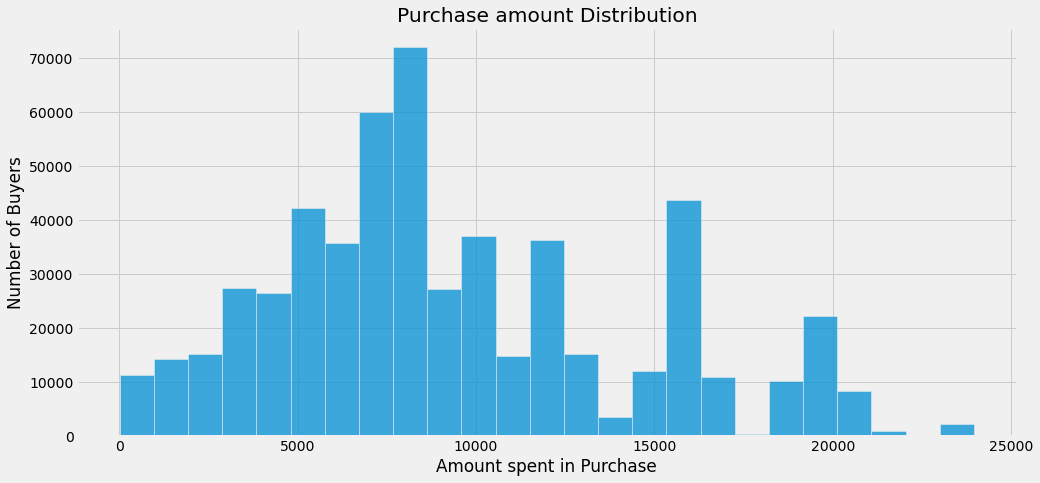

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7))
sns.histplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

Observations : Most of the buyers are spending around 9000 rupees.

It seems like our target variable has an almost Gaussian distribution/ Normal Distribution.

Now that we’ve analysed our target variable, let’s consider our predictors(IV). Let’s start by seeing which of our features are numeric.

In [13]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
dtype: object

## Distribution of the variable Marital_Status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

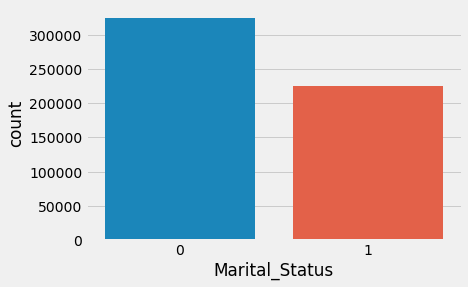

In [14]:
sns.countplot(x="Marital_Status",data=train)

As expected there are more single people buying products than married people.

## Distribution of the variable Product_Category_1

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

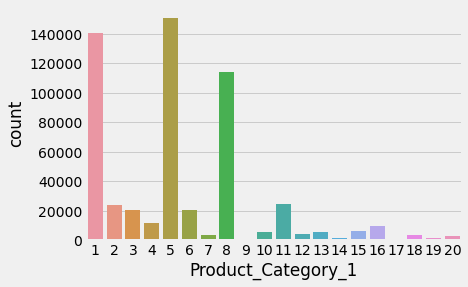

In [15]:
sns.countplot(x="Product_Category_1",data=train)
#plt.xticks()

From the distribution for products from category one, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents.

## Distribution of the variable Product_Category_2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '9.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '13.0'),
  Text(12, 0, '14.0'),
  Text(13, 0, '15.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0')])

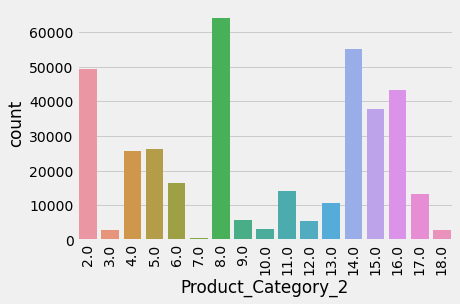

In [16]:
sns.countplot(x="Product_Category_2",data=train)
plt.xticks(rotation=90)

## Correlation between Numerical Predictors and Target variable

In [17]:
corr = numeric_features.corr()


<AxesSubplot:>

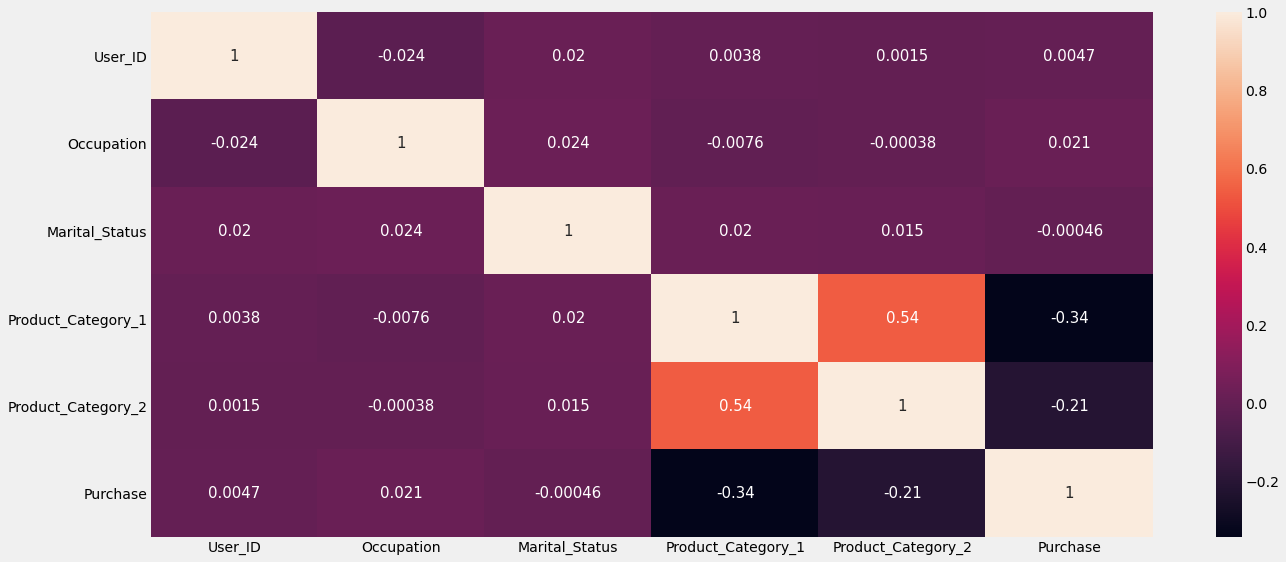

In [18]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,  annot=True,annot_kws={'size': 15})

There seems to be no multicollinearity with our predictors which is a good thing, although there is some correlation among the product categories

## Analysis on Categorical Predictors

### Distribution of the variable Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

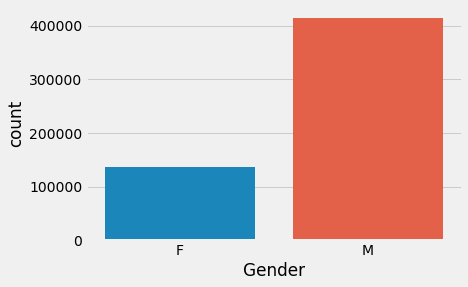

In [19]:
sns.countplot(x="Gender",data=train)

Most of the buyers are male

<AxesSubplot:xlabel='Age', ylabel='count'>

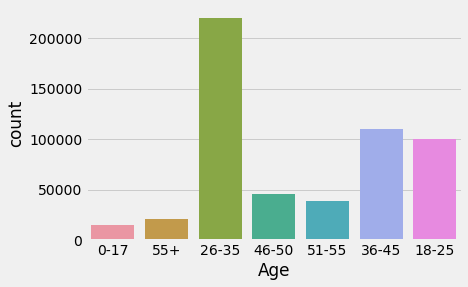

In [20]:
sns.countplot(x="Age",data=train)

most purchases are made by people between 26 to 35 years old.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

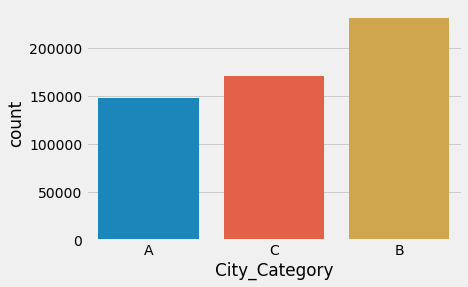

In [21]:
sns.countplot(x="City_Category",data=train)

most of the buyrs are from city B

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

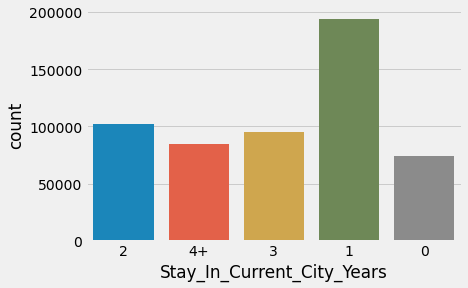

In [22]:
sns.countplot(x="Stay_In_Current_City_Years",data=train)

The tendency looks like the longest someone is living in that city the less chance they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

## Bivariate Analysis

### now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

In [20]:
marital_status_pivot= train.pivot_table(index='Marital_Status',values='Purchase', aggfunc=np.mean)
marital_status_pivot

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


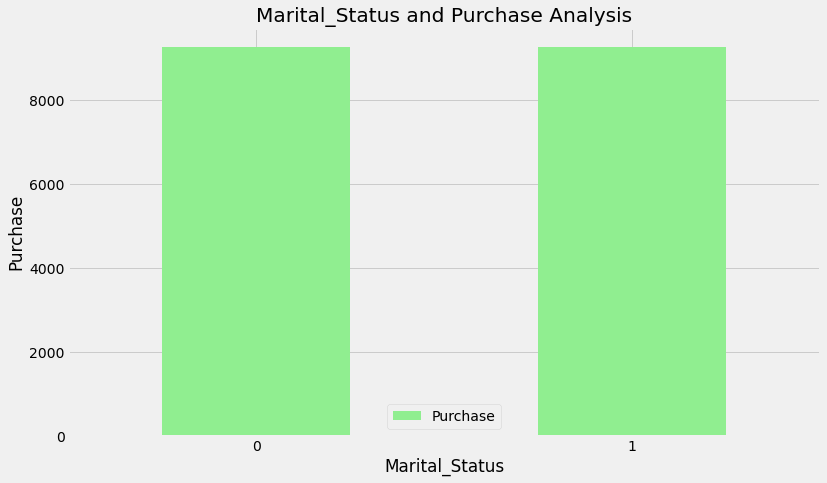

In [21]:
marital_status_pivot.plot(kind='bar', color='lightgreen',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

We had more single customers than married. However, on average an individual customer tends to spend the same amount independently if his/her is married or not

In [22]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_category_1_pivot

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


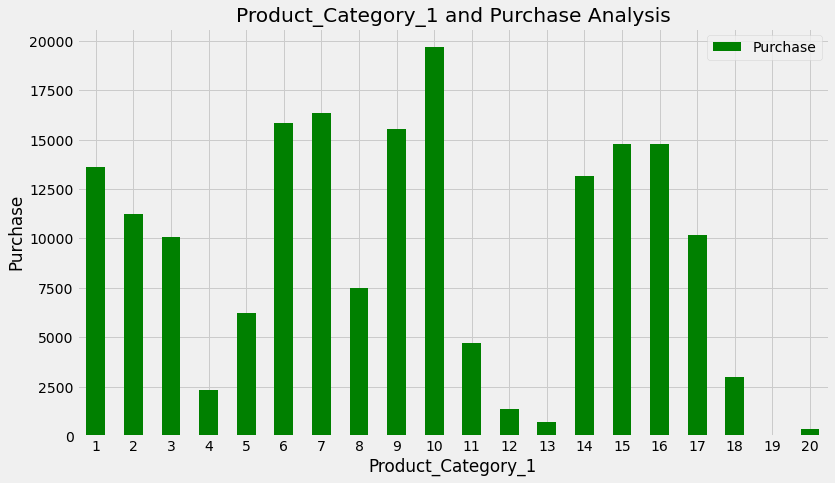

In [23]:
Product_category_1_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

In [24]:
Product_category_2_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_category_2_pivot

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


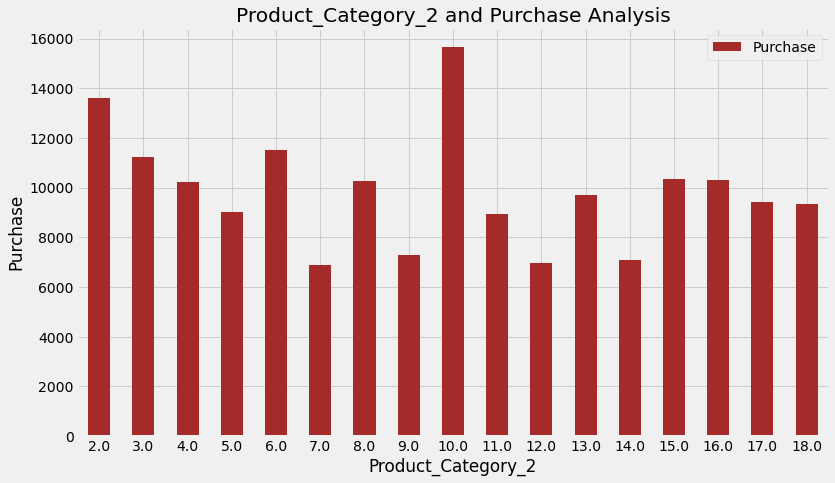

In [25]:
Product_category_2_pivot.plot(kind='bar', color='brown',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [26]:
gender_pivot = train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
gender_pivot

,Purchase
Gender,
F,8734.565765
M,9437.526040


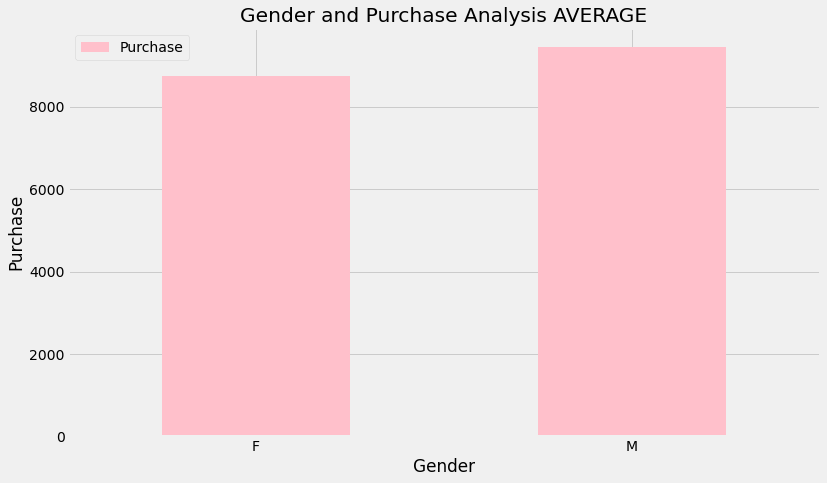

In [27]:
gender_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

On average the male gender spends more money on purchase contrary to female, and also the percentage of male buyers is higher than female buyers

In [28]:
age_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)
age_pivot

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


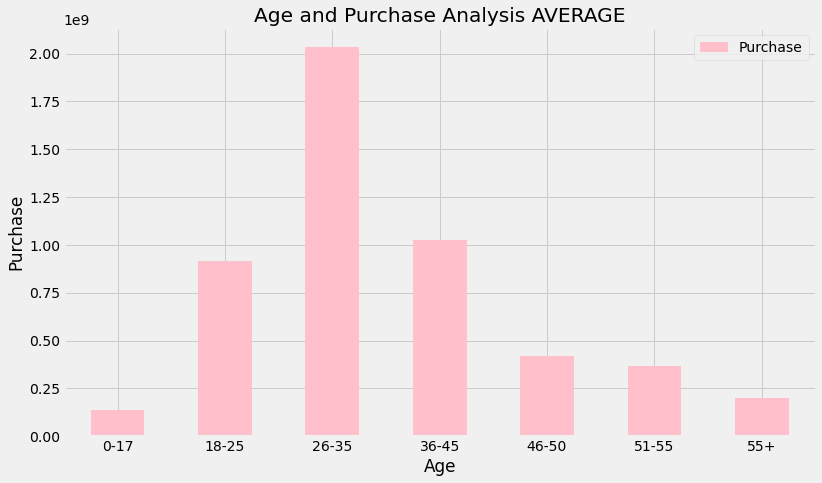

In [29]:
age_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

In [30]:
city_pivot = train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
city_pivot

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


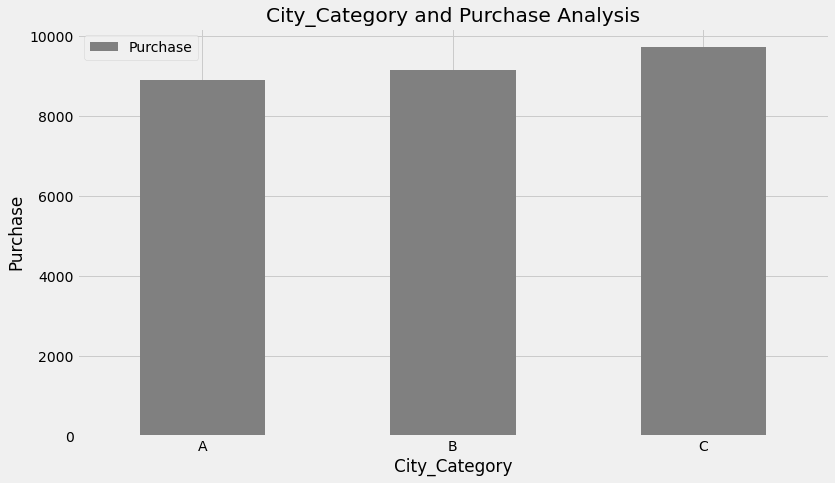

In [31]:
city_pivot.plot(kind='bar', color='grey',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

We saw previously that city type ‘B’ had the highest number of purchases registered. However, the city whose buyers spend the most is city type ‘C’.

In [32]:
Stay_In_Current_City_Years_pivot = train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4+,9275.598872


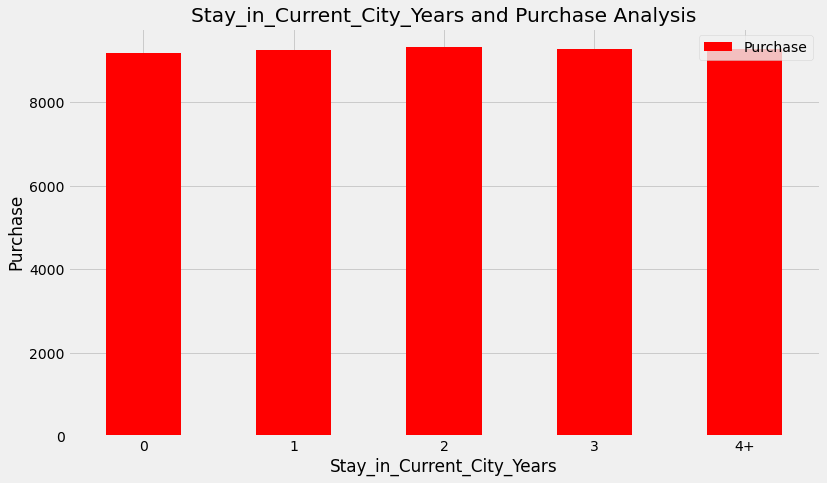

In [33]:
Stay_In_Current_City_Years_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Again, we see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

## Data Pre-Processing

In [34]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


It is generally a good idea to combine both test and train sets into one, in order to perform data cleaning and feature engineering and later divide them again. With this step we do not have to go through the trouble of repeating twice the same code, for both datasets. Let’s combine them into a dataframe datawith a source column specifying where each observation belongs.

In [35]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

df = pd.concat([train,test], ignore_index = True, sort = False)

print(train.shape, test.shape, df.shape)

(550068, 12) (233599, 12) (783667, 13)


Since train set do not contain column product_category_3 , it has to be deleted from test as well as combined data frame

In [36]:
test.drop(["Product_Category_3"],  axis=1, inplace=True)
df.drop(["Product_Category_3"],  axis=1, inplace=True)

In [37]:
print(train.shape, test.shape, df.shape)

(550068, 12) (233599, 11) (783667, 12)


## Dealing with Null-Values

In [38]:
#Check the percentage of null values per variable
df.isnull().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Purchase                      29.808452
source                         0.000000
dtype: float64

In [39]:
# Replacing Null Values in Product_Category_2 with the median of the column
df["Product_Category_2"].fillna(train["Product_Category_2"].median(), inplace = True)

Removing Product_Category_1 group 19 and 20 from Train as this is not in Product_Category_2

In [40]:
#Get index of all columns with product_category_1 equal 19 or 20 from train

ind = df.index[(df.Product_Category_1.isin([19,20])) & (df.source == "train")]
df = df.drop(ind)

In [41]:
df.shape

(779514, 12)

## Delaing with Categorical Values

In [42]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
source                         object
dtype: object

The categorical columns are Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years and Source

In [43]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = df.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = df[col].value_counts()
    print("\nThis is the frequency distribution for " + col + ":")
    print(frequency)


This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00126342       1
P00073342       1
P00072142       1
P00069642       1
P00074742       1
Name: Product_ID, Length: 3672, dtype: int64

This is the frequency distribution for Gender:
M    587052
F    192462
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    311554
36-45    155898
18-25    141209
46-50     64902
51-55     54450
55+       30316
0-17      21185
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    328524
C    241487
A    209503
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     274937
2     144599
3     134750
4+    120054
0     105174
Name: Stay_In_Current_City_Years, dtype: int64


## Feature Engineering

### Converting gender to binary

In [44]:
gender_dict = {'F':0, 'M':1}
df["Gender"] = df["Gender"].apply(lambda x: gender_dict[x])

df["Gender"].value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

### Converting Age to numeric values

In [45]:
age_dict={'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df['Age']=df['Age'].apply(lambda x:age_dict[x])
df['Age'].value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

### Converting city_category to Numeric

In [46]:
city={'A':0,'B':1,'C':2}
df['City_Category']=df['City_Category'].apply(lambda x: city[x])
df['City_Category'].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

### Converting Stay_In_Current_City_Year to numeric

In [86]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(stay).astype(int) 

## Exporting Data

In [87]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_clean.csv",index=False)
test.to_csv("test_clean.csv",index=False)

C:\Users\reach\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
train= pd.read_csv('train_clean.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057.0
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,7969.0


In [89]:
test= pd.read_csv('test_clean.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,NaN
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,NaN


## Modelling

In [90]:
X = train.drop(['Product_ID','User_ID','Purchase'], axis=1)
y = train["Purchase"]

In [91]:
# splitting train and test set
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In order to identify the best model,we will compare the following ml algorithms:

Random Forest Regressor

Linear Regression

Decision Tree Regressor

### Random Forest Regreesor Model

In [92]:
#model
%time
rf_regressor = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

rf_regressor.fit(X_train, y_train)

Wall time: 0 ns


RandomForestRegressor(n_jobs=-1, random_state=42)

### Linear regression model

In [95]:
#model
%time
lr_regressor=LinearRegression(normalize=True, n_jobs=-1)

lr_regressor.fit(X_train, y_train)

Wall time: 0 ns


LinearRegression(n_jobs=-1, normalize=True)

### Decision Tree Regressor

In [96]:
# model
%time
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

Wall time: 0 ns


DecisionTreeRegressor()

## Prediction and Metrics

In [102]:
def pred(mod,X_test,y_test):
  y_pred=mod.predict(X_test)
  R2 = r2_score(y_test, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  return R2, RMSE


### Random Forest Regressor

In [103]:
r2_score_rf, rmse_rf= pred(rf_regressor,X_test,y_test)

### Linear Regression

In [104]:
r2_score_lr, rmse_lr= pred(lr_regressor,X_test,y_test)

### Decision Tree Regressor

In [105]:
r2_score_dt, rmse_dt= pred(DT_regressor,X_test,y_test)

In [106]:
compare = {"R^2_score":[r2_score_rf, r2_score_lr,r2_score_dt],
            " Root Mean Squared Error": [rmse_rf,rmse_lr, rmse_dt]}


Compare = pd.DataFrame(compare, index=[["Random Forest Regressor", "Linear Regression","Decision Tree Regressor"]])
Compare

,R^2_score,Root Mean Squared Error
Random Forest Regressor,0.630569,3027.104231
Linear Regression,0.107312,4705.549550
Decision Tree Regressor,0.598450,3155.952105


It seems that among all the three models, Random Forest Regressor has highest R^2_score and lowest Root Mean Squared Error.

Thus Random Forest Regressor is performs best.

## Improving Model

Optimizing hyperparameters for machine learning models is a key step in making accurate predictions. Hyperparameters define characteristics of the model that can impact model accuracy and computational efficiency. They are typically set prior to fitting the model to the data. In contrast, parameters are values estimated during the training process that allow the model to fit the data. Hyperparameters are often optimized through trial and error; multiple models are fit with a variety of hyperparameter values, and their performance is compared.

Cross-validation is often used to determine the optimal values for hyperparameters; we want to identify a model structure that performs the best on records it has not been trained on. A variety of hyperparameter values should be considered.

In [110]:
grid =  {"n_estimators": [10,50,100],
       "max_depth": [None,10,20,30,40,50,],
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": [2,10,15],
       "min_samples_split": [2,5,20]}

In [111]:
randomsearchCV = RandomizedSearchCV(rf_regressor, param_distributions = grid, n_iter = 5, cv=5,  verbose = True, n_jobs=-1)

In [112]:
%time
randomsearchCV.fit(X_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 10, 15],
                                        'min_samples_split': [2, 5, 20],
                                        'n_estimators': [10, 50, 100]},
                   verbose=True)

In [113]:
randomsearchCV.best_params_

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 15,
 'max_features': 'auto',
 'max_depth': 20}

Fitting the data with Best Parameters

In [114]:
rf_regressor_tune = RandomForestRegressor(n_estimators=100, max_depth = 50, max_features = 'auto', min_samples_leaf =10,
                                     min_samples_split=2)

In [115]:
rf_regressor_tune.fit(X_train, y_train) 

RandomForestRegressor(max_depth=50, min_samples_leaf=10)

In [116]:
r2_rf_tune, rmse_rf_tune=pred(rf_regressor_tune,X_test,y_test)

In [117]:
# compare prediction before and after Tunning

compare1 = {"R^2_score":[r2_score_rf, r2_rf_tune],
            " Root Mean Squared Error": [rmse_rf,rmse_rf_tune]}


Compare1 = pd.DataFrame(compare1, index=[["Before_tune", "After_tune",]])
Compare1

,R^2_score,Root Mean Squared Error
Before_tune,0.630569,3027.104231
After_tune,0.652899,2934.190721


Our model performed good while tuning hyperparameters: We have got higher R^2, and lower RMSE compared to same values before tuning the hyperparameters

### Make predictions on test data with the model whose hyperparameters are tuned

In [118]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,NaN
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,NaN


In [119]:
# No. of features used to train the model must match with the input
# Droppping User_id , Product_id and purchase columns
predicted= test[['User_ID','Product_ID']]
test =test.drop(['User_ID','Product_ID','Purchase'],axis=1)

In [120]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1,4,7,1,2,1,1,11.0
1,1,2,17,2,0,0,3,5.0
2,0,3,1,1,4,1,5,14.0
3,0,3,1,1,4,1,4,9.0
4,0,2,1,2,1,0,4,5.0


In [121]:
test_pred = rf_regressor_tune.predict(test)
test_pred

array([16171.74265846, 10032.35755669,  7550.90224171, ...,
       12628.67366326, 20658.00915547,  2554.5643617 ])

In [122]:
print(rf_regressor_tune.feature_importances_)

[0.00486584 0.01521705 0.02653604 0.00817834 0.01822322 0.00689444
 0.90273361 0.01735146]


In [123]:
columns = pd.DataFrame({"Features": test.columns, 
                        "Feature Importance" :rf_regressor_tune.feature_importances_})

In [124]:
columns.sort_values("Feature Importance", ascending = False).reset_index(drop=True)

,Features,Feature Importance
0,Product_Category_1,0.902734
1,Occupation,0.026536
2,Stay_In_Current_City_Years,0.018223
3,Product_Category_2,0.017351
4,Age,0.015217
5,City_Category,0.008178
6,Marital_Status,0.006894
7,Gender,0.004866


<AxesSubplot:xlabel='Feature Importance', ylabel='Features'>

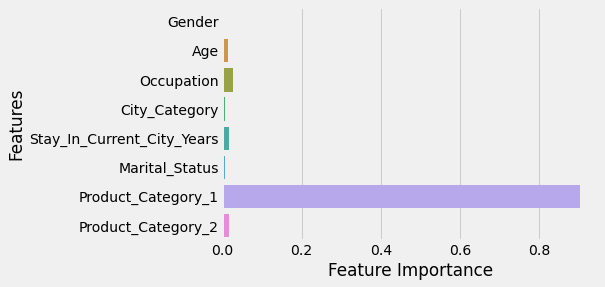

In [125]:
sns.barplot(y="Features", x = "Feature Importance", data = columns)

Product_Category_1 feature has by far the highest regression coefficient and is very important feature in explaining, positively, why people purchase in mass on Black Friday.

In [126]:
predicted['Predicted_Purchase']=test_pred

In [127]:
predicted.head()

,User_ID,Product_ID,Predicted_Purchase
0,1000004,P00128942,16171.742658
1,1000009,P00113442,10032.357557
2,1000010,P00288442,7550.902242
3,1000010,P00145342,2218.679950
4,1000011,P00053842,2195.958900


In [128]:
#saving calculated purchase in a csv file
predicted.to_csv("predict.csv",index=False)

In [131]:
import pickle
pickle_file = open('model.pkl', 'ab')
pickle.dump(rf_regressor_tune, pickle_file)                     
pickle_file.close()